# Multinomial Naive Bayes classifier

The data came from the [Kaggle competition](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data), Sentiment Analysis on Movie Reviews. The reviews are divided into separate sentences and sentences are further divided into separate phrases. All phrases have a sentiment score so that a model can be trained on which words lend a positive, neutral, or negative sentiment to a sentence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from model import NLPModel
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('ggplot')

%config IPCompleter.greedy=True

## Create the model object
The NLP model object uses a Naive Bayes classifier and a TFIDF vectorizer:

clf = MultinomialNB()
vectorizer = TfidfVectorizer()

Naives Bayes classifier to predict the sentiment of phrases found in movie reviews.

In [2]:
model = NLPModel()

## Get the data

In [3]:
with open('lib/data/train.tsv') as f:
    data = pd.read_csv(f, sep='\t')

In [4]:
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


## Distribution of ratings from the Kaggle dataset

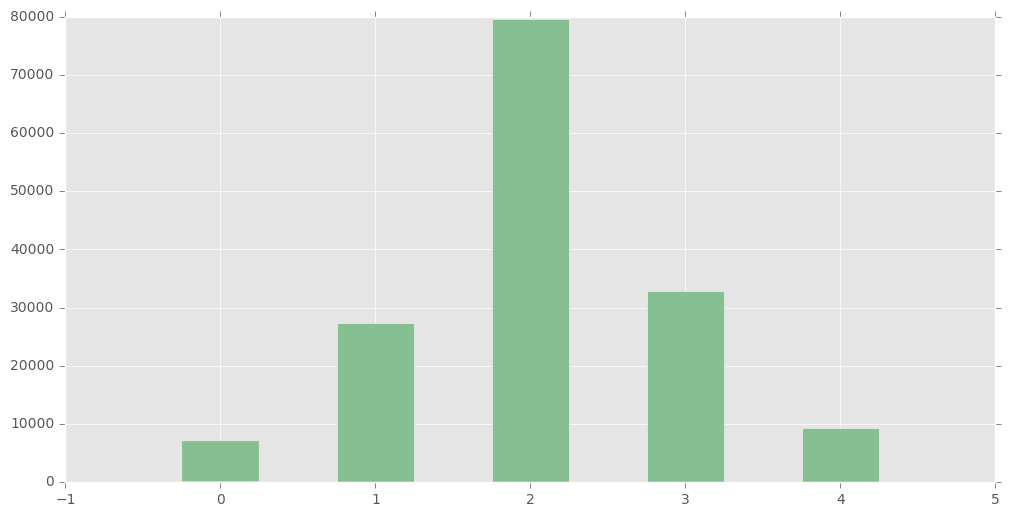

In [5]:
num_unique = len(data['Sentiment'].unique())
data['Sentiment'].hist(figsize=(12,6), bins=np.arange(num_unique+1)-0.5, rwidth=0.5, color='#86bf91', zorder=2)

## Use only the 1 star and 5 star reviews
For this example, we want to only predict positive or negative sentiment using the extreme cases.

The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [6]:
pos_neg = data[(data['Sentiment'] == 0) | (data['Sentiment'] == 4)]

## Relabel as 0 for negative and 1 for positive

In [7]:
pos_neg['Binary'] = pos_neg.apply(lambda x: 0 if x['Sentiment'] == 0 else 1, axis=1)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Fit a vectorizer to the vocabulary in the dataset

In [8]:
model.vectorizer_fit(pos_neg.loc[:, 'Phrase'])

## Transform the text in the dataset to its vectorized representation

In [9]:
X = model.vectorizer_transform(pos_neg.loc[:, 'Phrase'])

C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


## Separate the target from the data

In [10]:
y = pos_neg.loc[:, 'Binary']

## Cross Validation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Train the model

In [12]:
model.train(X_train, y_train)

In [13]:
from util import plot_roc

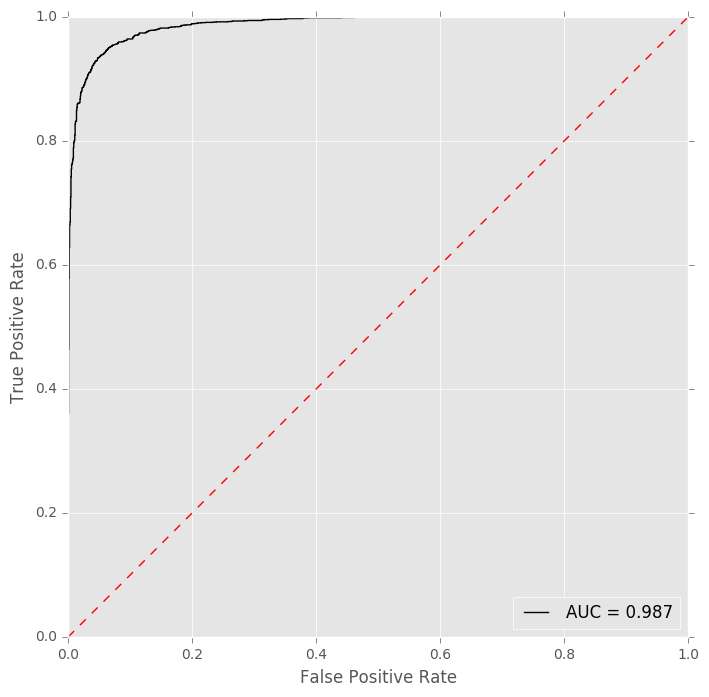

In [14]:
model.plot_roc(X_test, y_test, size_x=8, size_y=8)

# Predict Sentiment

In [15]:
model = NLPModel()

clf_path = 'lib/models/SentimentClassifier.pkl'
with open(clf_path, 'rb') as f:
    model.clf = pickle.load(f)

vec_path = 'lib/models/TFIDFVectorizer.pkl'
with open(vec_path, 'rb') as f:
    model.vectorizer = pickle.load(f)

def PredictSentiment(text):
    # vectorize the user's query and make a prediction
    uq_vectorized = model.vectorizer_transform(np.array([text]))
    prediction = model.predict(uq_vectorized)
    pred_proba = model.predict_proba(uq_vectorized)

    # Output either 'Negative' or 'Positive' along with the score
    if prediction == 0:
        pred_text = 'Negative'
    else:
        pred_text = 'Positive'

    # round the predict proba value and set to new variable
    confidence = round(pred_proba[0], 3)

    # create JSON object
    output = {'prediction': pred_text, 'confidence': confidence}

    return output

C:\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.19.1 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [16]:
s = "That was pretty entertaining"
res = PredictSentiment(s)
print(res)

{'prediction': 'Positive', 'confidence': 0.826}


C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [17]:
s = "ilks, this looks awful"
res = PredictSentiment(s)
print(res)

{'prediction': 'Negative', 'confidence': 0.146}


C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [18]:
s = "Machine Learning useful, but it's hard to learn."
res = PredictSentiment(s)
print(res)

{'prediction': 'Negative', 'confidence': 0.487}


C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [19]:
s = "What a beautiful sky."
res = PredictSentiment(s)
print(res)

{'prediction': 'Positive', 'confidence': 0.957}


C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [20]:
s = "中文也會通嗎?"
res = PredictSentiment(s)
print(res)

{'prediction': 'Positive', 'confidence': 0.567}


C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [21]:
s = "I don't think this move is good"
res = PredictSentiment(s)
print(res)

{'prediction': 'Positive', 'confidence': 0.601}


C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
